In [1]:
import os
import cv2
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Run this line of code only if you're using Google Colab**

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
SEED_VALUE = 42

random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [4]:
def display_img(img_path):
  test_img = cv2.imread(img_path)
  img_cvt = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
  plt.imshow(img_cvt)

**Run these lines of fcode if you're using Google Colab**

In [5]:
# test_img_path_1 = '/content/drive/My Drive/alpaca_database/training/alpaca/0a2ea8f93b4cb30a.jpg'
# test_img_path_2 = '/content/drive/My Drive/alpaca_database/training/alpaca/0b2a2c061ef16759.jpg'
# test_img_path_3 = '/content/drive/My Drive/alpaca_database/training/alpaca/0cb5cae66bb9c4cd.jpg'

**Run these lines of code if you're using Kaggle**

In [6]:
test_img_path_1 = '/kaggle/input/alpaca-image-classification-dataset/alpaca_database/training/alpaca/01ad3ff1d94eb557.jpg'
test_img_path_2 = '/kaggle/input/alpaca-image-classification-dataset/alpaca_database/training/alpaca/038fae9e70c4c3f1.jpg'
test_img_path_3 = '/kaggle/input/alpaca-image-classification-dataset/alpaca_database/training/alpaca/053608552d63f724.jpg'

In [7]:
read_img1 = cv2.imread(test_img_path_1)
read_img1.shape

(670, 1024, 3)

In [8]:
read_img2 = cv2.imread(test_img_path_2)
read_img2.shape

(768, 1024, 3)

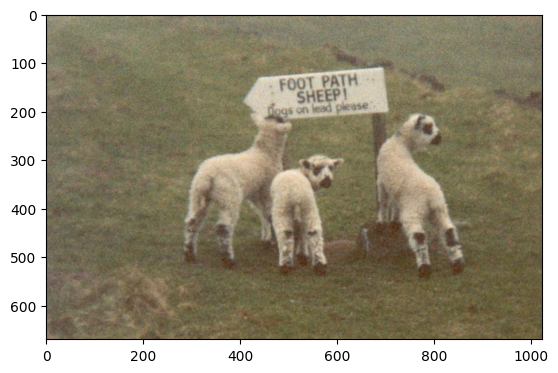

In [9]:
display_img(test_img_path_1)

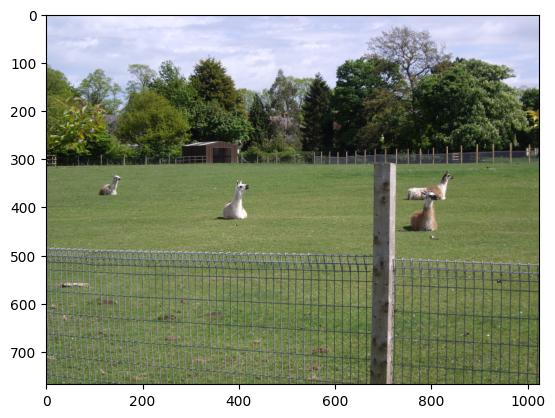

In [10]:
display_img(test_img_path_2)

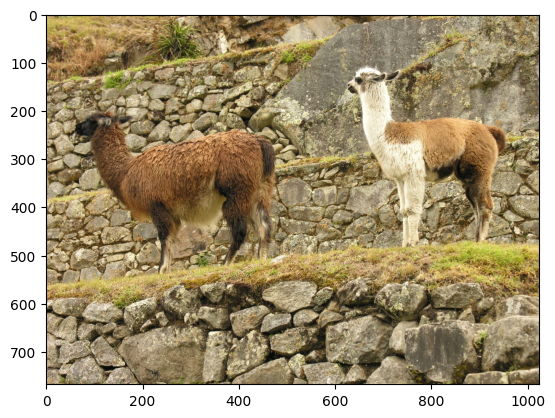

In [11]:
display_img(test_img_path_3)

In [12]:
# image_files = []
# for root, dirs, files in os.walk('/kaggle/input/alpaca-image-classification-dataset/alpaca_database/training'):
#     for file in files:
#         if file.endswith('.jpg'):  
#             image_files.append(os.path.join(root, file))

# random.shuffle(image_files)
# image_files

In [13]:
train = ImageDataGenerator(rescale = 1/255)
# train_datagen_shuffled = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

**Run these lines of code if you're using Google Colab**

In [14]:
# train_dataset = train.flow_from_directory('/content/drive/My Drive/alpaca_database/training', target_size = (400, 400),
# batch_size = 32, class_mode = 'binary')
# test_dataset = test.flow_from_directory('/content/drive/My Drive/alpaca_database/testing', target_size = (400, 400),
# batch_size = 32, class_mode = 'binary')
# validation_dataset = validation.flow_from_directory('/content/drive/My Drive/alpaca_database/validation', target_size = (400, 400),
# batch_size = 32, class_mode = 'binary')

**Run these lines of code if you're using Kaggle**

In [15]:
train_dataset = train.flow_from_directory('/kaggle/input/alpaca-image-classification-dataset/alpaca_database/training', target_size = (400, 400),
                                         batch_size = 32, class_mode = 'binary', shuffle = True)
# train_dataset_shuffled = train_datagen_shuffled.flow_from_directory(image_files, target_size=(400, 400), batch_size = 32, class_mode='binary', shuffle=True)
validation_dataset = validation.flow_from_directory('/kaggle/input/alpaca-image-classification-dataset/alpaca_database/validation', target_size = (400, 400),
                                                   batch_size = 32, class_mode = 'binary')

Found 200 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [16]:
train_dataset.class_indices

{'alpaca': 0, 'not alpaca': 1}

In [17]:
validation_dataset.class_indices

{'alpaca': 0, 'not alpaca': 1}

In [18]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [19]:
len(train_dataset.classes)

200

In [20]:
def cnn_model(input_shape = (400, 400, 3)):
  model = Sequential()
  #--------------------------------------
  #Conv Block 1: 16 Filters, Max Pool
  #--------------------------------------
  model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = input_shape))
  model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Dropout(0.25))
  #--------------------------------------
  #Conv Block 2: 32 Filters, Max Pool
  #--------------------------------------
  model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
  model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Dropout(0.25))
  #---------------------------------------
  #Conv Block 3: 64 Filters, Max Pool
  #---------------------------------------
  model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
  model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Dropout(0.25))
#   #--------------------------------------
#   #Conv Block 4: 128 Filters, Max Pool
#   #--------------------------------------
#   model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
#   model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
#   model.add(BatchNormalization())
#   model.add(MaxPooling2D(pool_size = (2, 2)))
#   model.add(Dropout(0.25))
  # #---------------------------------------
  # #Conv Block 5: 512 Filters, Max Pool
  # #---------------------------------------
  # model.add(Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation = 'relu'))
  # model.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation = 'relu'))
  # model.add(Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation = 'relu'))
  # model.add(MaxPooling2D(pool_size = (2, 2)))
  # model.add(Dropout(0.35))
  # #----------------------------------------
  # #Conv Block 6: 1024 Filters, Max Pool
  # #----------------------------------------
  # model.add(Conv2D(filters = 1024, kernel_size = 3, padding = 'same', activation = 'relu'))
  # model.add(Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation = 'relu'))
  # model.add(Conv2D(filters = 1024, kernel_size = 3, padding = 'same', activation = 'relu'))
  # model.add(Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation = 'relu'))
  # model.add(Conv2D(filters = 1024, kernel_size = 3, padding = 'same', activation = 'relu'))
  # model.add(MaxPooling2D(pool_size = (2, 2)))
  # model.add(Dropout(0.35))
  #-----------------------------------------
  #Flatten CN Network
  #----------------------------------------
  model.add(Flatten())
  model.add(Dense(512, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation = 'sigmoid'))
  return model

In [21]:
model = cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 400, 400, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 400, 400, 16)      2320      
                                                                 
 batch_normalization (Batch  (None, 400, 400, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 200, 200, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 200, 200, 16)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 200, 200, 32)      4

In [22]:
model.compile(optimizer = RMSprop(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

**Use TensorFlow's debugging tools like tf.debugging.assert_shapes() or tf.debugging.assert_equal_shapes() to check tensor shapes at different stages of the model.**

In [23]:
history = model.fit(train_dataset, epochs = 40, batch_size = 32, verbose = 1, validation_data = validation_dataset)

Epoch 1/40


2023-12-22 13:49:40.748824: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


7/7 [==============================] - 23s 1s/step - loss: 126.8574 - accuracy: 0.5900 - val_loss: 7.3737 - val_accuracy: 0.5000
Epoch 2/40
7/7 [==============================] - 4s 524ms/step - loss: 36.8257 - accuracy: 0.6350 - val_loss: 26.4078 - val_accuracy: 0.5000
Epoch 3/40
7/7 [==============================] - 4s 510ms/step - loss: 25.6911 - accuracy: 0.6950 - val_loss: 0.9523 - val_accuracy: 0.4500
Epoch 4/40
7/7 [==============================] - 4s 616ms/step - loss: 21.9845 - accuracy: 0.7800 - val_loss: 49.8751 - val_accuracy: 0.5000
Epoch 5/40
7/7 [==============================] - 4s 531ms/step - loss: 10.8255 - accuracy: 0.8500 - val_loss: 0.8887 - val_accuracy: 0.5667
Epoch 6/40
7/7 [==============================] - 4s 509ms/step - loss: 8.6889 - accuracy: 0.8450 - val_loss: 9.4791 - val_accuracy: 0.5000
Epoch 7/40
7/7 [==============================] - 4s 512ms/step - loss: 3.8143 - accuracy: 0.8750 - val_loss: 35.3699 - val_accuracy: 0.5000
Epoch 8/40
7/7 [========

In [24]:
train_loss = history.history['loss']
train_accu = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accu = history.history['val_accuracy']

In [25]:
def plot_results(metrics, metric_names = None, ylim = None, ylabel = None, title = None, color = None):
  figure, ax = plt.subplots(figsize = (16, 6))
  if not(isinstance(metric_names, list) or isinstance(metric_names, tuple)):
    metrics = [metrics, ]
    metric_names = [metric_names, ]
  for idx, metric in enumerate(metrics):
    ax.plot(metric, color = color[idx])
  plt.xlim([0, len(train_loss)])
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel(ylabel)
  plt.title(title)
  plt.legend(metric_names)
  plt.grid(True)
  plt.show()
  plt.close()

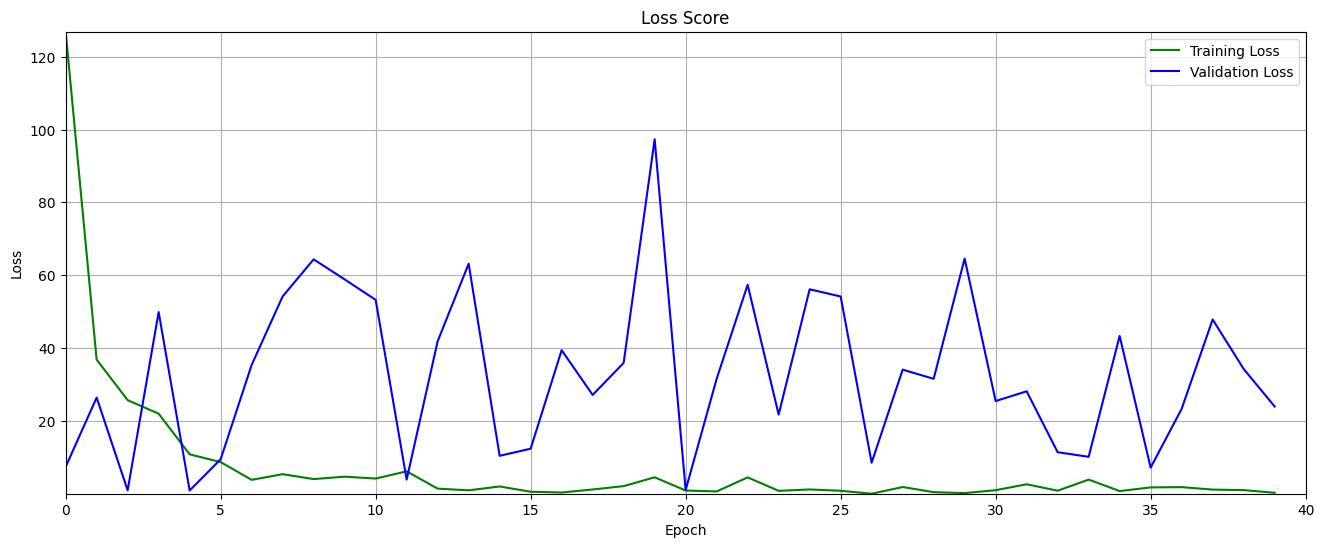

In [26]:
plot_results(metrics = [train_loss, validation_loss], metric_names = ['Training Loss', 'Validation Loss'], ylim = [np.min((validation_loss, train_loss)), np.max((validation_loss, train_loss))], ylabel = 'Loss', title = 'Loss Score', color = ['g', 'b'])

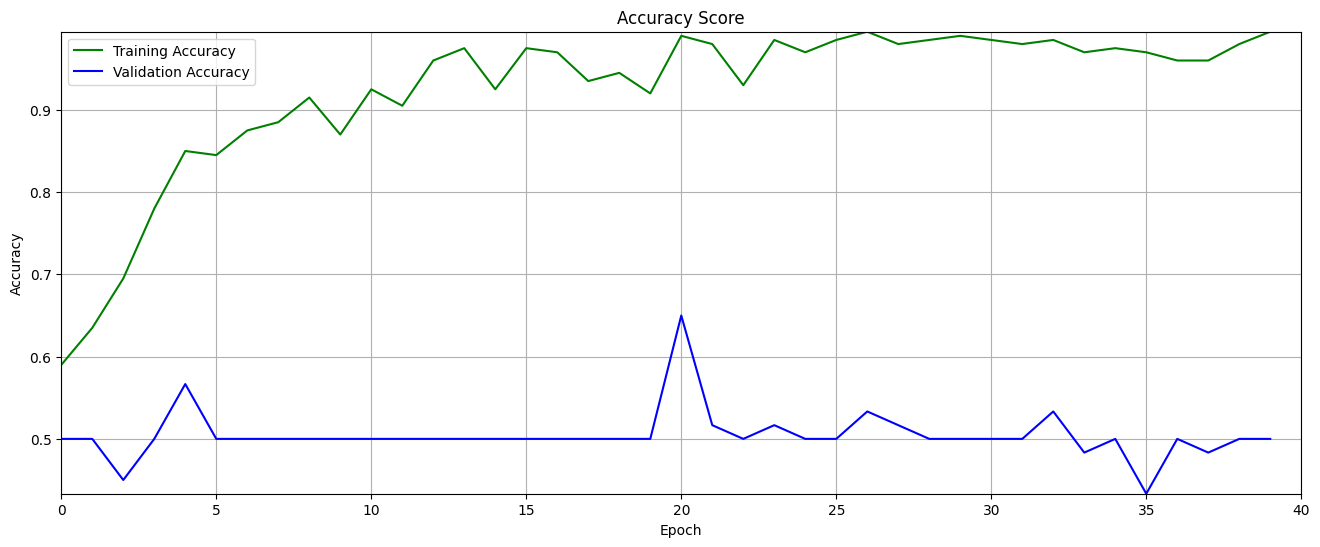

In [27]:
plot_results(metrics = [train_accu, validation_accu], metric_names = ['Training Accuracy', 'Validation Accuracy'], ylim = [np.min((validation_accu, train_accu)), np.max((validation_accu, train_accu))], ylabel = 'Accuracy', title = 'Accuracy Score', color = ['g', 'b'])

In [28]:
model.save('saved_cnn_model')

In [29]:
from tensorflow.keras import models

reloaded_cnn_model = models.load_model('saved_cnn_model')

In [30]:
#dir_path = '/content/drive/My Drive/alpaca_database/testing'#Run this line of code when using Google Colab
dir_path = '/kaggle/input/alpaca-image-classification-dataset/alpaca_database/testing' #Run this line of code when using Kaggle
X_test = []
for i in os.listdir(dir_path):
  test_img_path = os.path.join(dir_path, i)
  img = cv2.imread(test_img_path)
  resized_img = cv2.resize(img, (400, 400))
  X_test.append(resized_img)
X_test = np.array(X_test)
X_test.shape

(67, 400, 400, 3)

In [31]:
new_data_arr = []
for i in os.listdir(dir_path):
    new_data_arr.append(i)
new_data_arr

['5745da51d2200d2f.jpg',
 '23340e0a6c0c9ef8.jpg',
 '9e2f4b02a0f8fba4.jpg',
 '8311dc486dbf1619.jpg',
 'a98f21d23d130b43.jpg',
 '8f7e6728e105904a.jpg',
 '9a663969742ef91e.jpg',
 '41dab290c7fdd400.jpg',
 '23d1d39d81d411da.jpg',
 '217b1cf5a47223cc.jpg',
 '2039ad72760129b7.jpg',
 '17c823ab5eeb6a69.jpg',
 '48f7992c2ca04cde.jpg',
 '24c7990ef69d8afa.jpg',
 '77d8f1427530d52c.jpg',
 '16adabd2abbebfe5.jpg',
 '079e864735144122.jpg',
 'baeda6e64debec97.jpg',
 '9ba6a9768c1c82e6.jpg',
 '25c9bd30fdfb944a.jpg',
 '028955b87770e194.jpg',
 '9695991da3e0e418.jpg',
 '039dfd67a8e053b8.jpg',
 '38a0f94d389dcdd0.jpg',
 '28e89dd91a538cd6.jpg',
 'b11c644804bf9b9d.jpg',
 '61bd08bf28568de6.jpg',
 '809742431930a66e.jpg',
 '7355d53dfbb9124c.jpg',
 '0155b267ade95d1e.jpg',
 '10f2a0bebe1e4b13.jpg',
 '57c6dbadc2b1fbf5.jpg',
 '81ad5f10f6d72225.jpg',
 'b29a220e817da2fd.jpg',
 '8766142369109e74.jpg',
 '207772d49ccca4f9.jpg',
 '512715c6bcdf90e8.jpg',
 'ba5aaca63e0afe66.jpg',
 '60411cfa2d4c0d21.jpg',
 '073f21a5b0fa62dc.jpg',


In [32]:
import pandas as pd

#ground_truth = pd.read_csv('/content/ground_truth.csv') #Run this line of code when using Google Colab
ground_truth = pd.read_csv('/kaggle/input/ground-truth/ground_truth.csv') #Run this line of code when using Kaggle
ground_truth

,filename,class
0,1076411586a28251.jpg,0
1,0346463867a297f4.jpg,0
2,a1a5b080473ba589.jpg,0
3,ba5aaca63e0afe66.jpg,0
4,b11c644804bf9b9d.jpg,0
...,...,...
62,9ba6a9768c1c82e6.jpg,1
63,9a663969742ef91e.jpg,1
64,8f7e6728e105904a.jpg,1
65,9abdf147aa9949fe.jpg,1


In [33]:
gt_class = list(ground_truth['class'])

In [34]:
ground_truth.shape

(67, 2)

In [35]:
len(gt_class)

67

In [36]:
len(new_data_arr)

67

In [37]:
csv_identifiers = ground_truth['filename']
matches = [idx for idx, identifier in enumerate (new_data_arr) if identifier == csv_identifiers[idx]]
mismatches = [idx for idx in range(len(new_data_arr)) if idx not in matches]
print(f'Matches found at indices:\n{matches}')
print(f'Mismatches found at:\n{mismatches}')

Matches found at indices:
[]
Mismatches found at:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]


In [38]:
if len(mismatches) != 0: 
    ground_truth['new_filenames'] = new_data_arr 
    gt_filenames = list(ground_truth['new_filenames'])
gt_filenames

['5745da51d2200d2f.jpg',
 '23340e0a6c0c9ef8.jpg',
 '9e2f4b02a0f8fba4.jpg',
 '8311dc486dbf1619.jpg',
 'a98f21d23d130b43.jpg',
 '8f7e6728e105904a.jpg',
 '9a663969742ef91e.jpg',
 '41dab290c7fdd400.jpg',
 '23d1d39d81d411da.jpg',
 '217b1cf5a47223cc.jpg',
 '2039ad72760129b7.jpg',
 '17c823ab5eeb6a69.jpg',
 '48f7992c2ca04cde.jpg',
 '24c7990ef69d8afa.jpg',
 '77d8f1427530d52c.jpg',
 '16adabd2abbebfe5.jpg',
 '079e864735144122.jpg',
 'baeda6e64debec97.jpg',
 '9ba6a9768c1c82e6.jpg',
 '25c9bd30fdfb944a.jpg',
 '028955b87770e194.jpg',
 '9695991da3e0e418.jpg',
 '039dfd67a8e053b8.jpg',
 '38a0f94d389dcdd0.jpg',
 '28e89dd91a538cd6.jpg',
 'b11c644804bf9b9d.jpg',
 '61bd08bf28568de6.jpg',
 '809742431930a66e.jpg',
 '7355d53dfbb9124c.jpg',
 '0155b267ade95d1e.jpg',
 '10f2a0bebe1e4b13.jpg',
 '57c6dbadc2b1fbf5.jpg',
 '81ad5f10f6d72225.jpg',
 'b29a220e817da2fd.jpg',
 '8766142369109e74.jpg',
 '207772d49ccca4f9.jpg',
 '512715c6bcdf90e8.jpg',
 'ba5aaca63e0afe66.jpg',
 '60411cfa2d4c0d21.jpg',
 '073f21a5b0fa62dc.jpg',


In [39]:
ground_truth

,filename,class,new_filenames
0,1076411586a28251.jpg,0,5745da51d2200d2f.jpg
1,0346463867a297f4.jpg,0,23340e0a6c0c9ef8.jpg
2,a1a5b080473ba589.jpg,0,9e2f4b02a0f8fba4.jpg
3,ba5aaca63e0afe66.jpg,0,8311dc486dbf1619.jpg
4,b11c644804bf9b9d.jpg,0,a98f21d23d130b43.jpg
...,...,...,...
62,9ba6a9768c1c82e6.jpg,1,9abdf147aa9949fe.jpg
63,9a663969742ef91e.jpg,1,9e411cef88b11bb7.jpg
64,8f7e6728e105904a.jpg,1,b61229f8854538e3.jpg
65,9abdf147aa9949fe.jpg,1,060e6719ae46dea6.jpg


In [40]:
ground_truth['new_class'] = 0
ground_truth

,filename,class,new_filenames,new_class
0,1076411586a28251.jpg,0,5745da51d2200d2f.jpg,0
1,0346463867a297f4.jpg,0,23340e0a6c0c9ef8.jpg,0
2,a1a5b080473ba589.jpg,0,9e2f4b02a0f8fba4.jpg,0
3,ba5aaca63e0afe66.jpg,0,8311dc486dbf1619.jpg,0
4,b11c644804bf9b9d.jpg,0,a98f21d23d130b43.jpg,0
...,...,...,...,...
62,9ba6a9768c1c82e6.jpg,1,9abdf147aa9949fe.jpg,0
63,9a663969742ef91e.jpg,1,9e411cef88b11bb7.jpg,0
64,8f7e6728e105904a.jpg,1,b61229f8854538e3.jpg,0
65,9abdf147aa9949fe.jpg,1,060e6719ae46dea6.jpg,0


In [41]:
for i in range(len(ground_truth['filename'])):
    file = ground_truth['new_filenames'][i]
    for j, filename in enumerate(ground_truth['filename']):
        if filename == file:
            ground_truth.loc[i, 'new_class'] = ground_truth.loc[j, 'class']

In [42]:
ground_truth

,filename,class,new_filenames,new_class
0,1076411586a28251.jpg,0,5745da51d2200d2f.jpg,1
1,0346463867a297f4.jpg,0,23340e0a6c0c9ef8.jpg,1
2,a1a5b080473ba589.jpg,0,9e2f4b02a0f8fba4.jpg,1
3,ba5aaca63e0afe66.jpg,0,8311dc486dbf1619.jpg,1
4,b11c644804bf9b9d.jpg,0,a98f21d23d130b43.jpg,0
...,...,...,...,...
62,9ba6a9768c1c82e6.jpg,1,9abdf147aa9949fe.jpg,1
63,9a663969742ef91e.jpg,1,9e411cef88b11bb7.jpg,1
64,8f7e6728e105904a.jpg,1,b61229f8854538e3.jpg,0
65,9abdf147aa9949fe.jpg,1,060e6719ae46dea6.jpg,1


In [43]:
gt_class = list(ground_truth['new_class'])
gt_class

[1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0]

In [44]:
predictions = reloaded_cnn_model.predict(X_test)
predictions = predictions.flatten().astype(int)
predictions.shape

3/3 [==============================] - 1s 228ms/step


(67,)

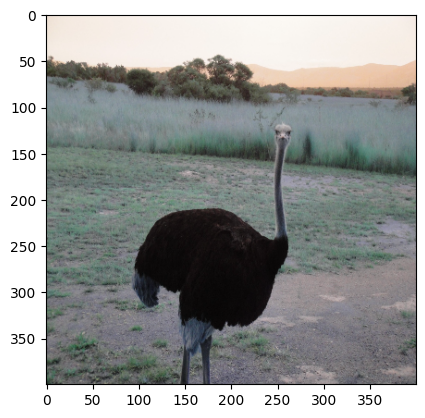

In [45]:
num_rows = 11
num_cols = 6
batch_data = X_test[0:num_rows * num_cols]
plt.imshow(batch_data[1])

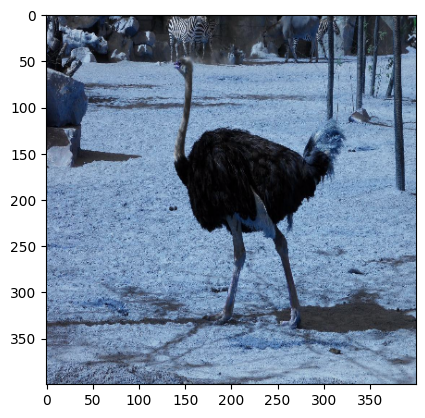

In [46]:
plt.imshow(X_test[0])

In [47]:
def evaluate_model(test_data):
  class_labels = ['Alpaca', 'Not Alpaca']
  num_rows = 11
  num_cols = 6
  batch_data = test_data[0:num_rows * num_cols]

  plt.figure(figsize = (20, 14))
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

  num_matches = 0
  for idx in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, idx + 1)
    plt.grid(False)
    plt.axis(False)
    plt.imshow(batch_data[idx])
    title = str(class_labels[predictions[idx]] + ':' + class_labels[gt_class[idx]])
    title_obj = plt.title(title, fontdict = {'fontsize': 10})
    if predictions[idx] == gt_class[idx]:
      num_matches += 1
      plt.setp(title_obj, color = 'g')
    else:
      plt.setp(title_obj, color = 'r')
    accu = num_matches / (idx + 1)

  print(f'Prediction Accuracy: {int(100 * accu) / 100}')
  return

Prediction Accuracy: 0.21


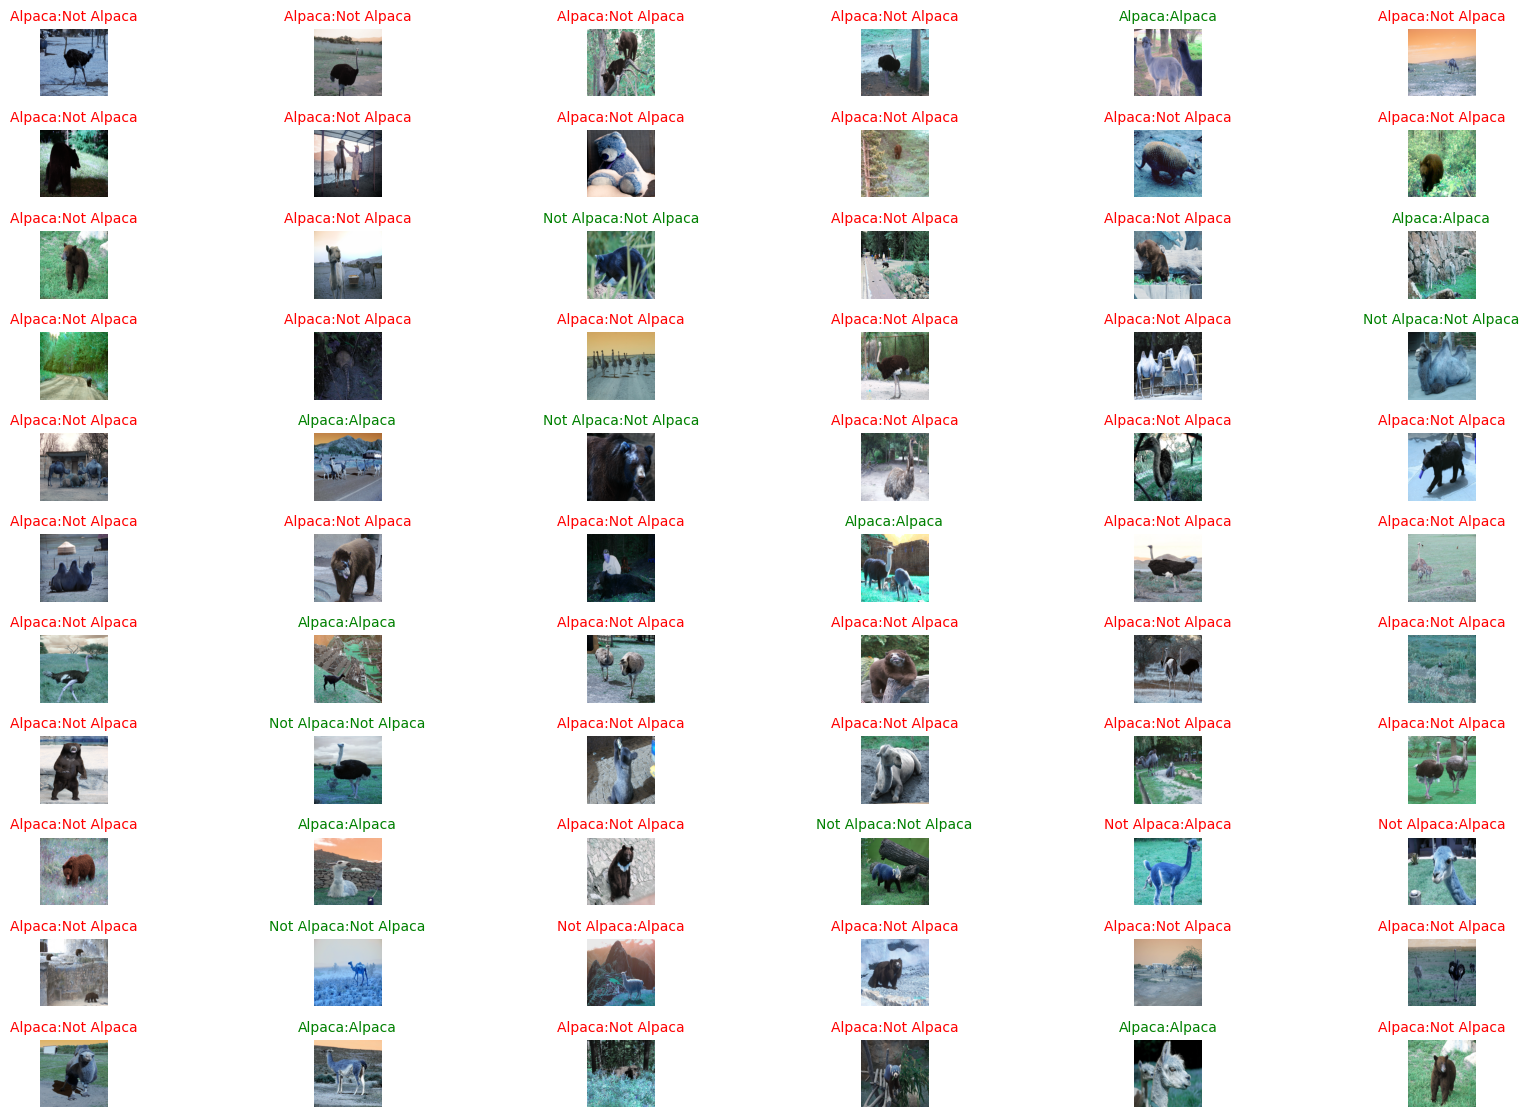

In [48]:
evaluate_model(X_test)

In [49]:
cm = tf.math.confusion_matrix(labels = gt_class, predictions = predictions)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 9,  3],
       [49,  6]], dtype=int32)>

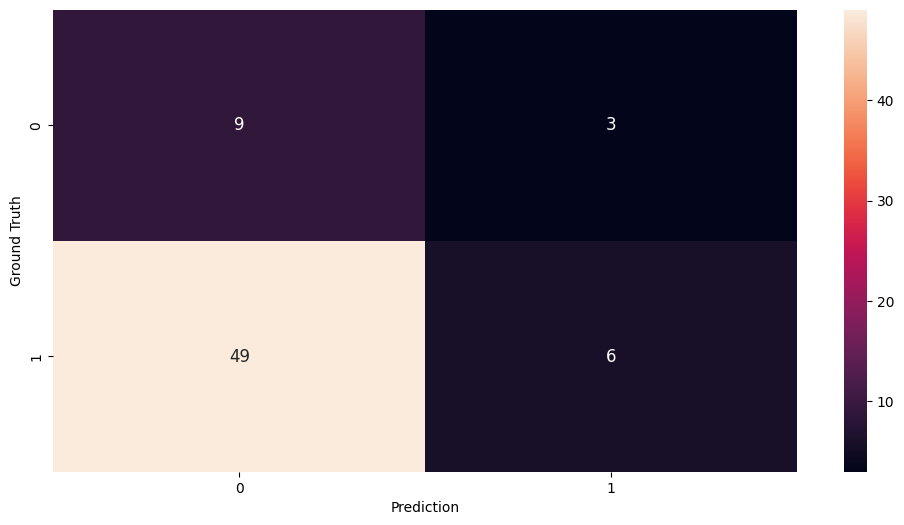

In [50]:
import seaborn as sns

plt.figure(figsize = (12, 6))
sns.heatmap(cm, annot = True, fmt = 'd', annot_kws = {'fontsize': 12})
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show()

In [51]:
# def model_app(img):
#   resized_img = cv2.resize(img, (400, 400))

#   if resized_img[-1] != 3:
#     raise ValueError('Input Image should have 3 channels (RGB)')

#   img_batch = np.expand_dims(resized_img, axis = 0)
#   model_prediction = reloaded_cnn_model.predict(img_batch)
#   class_label = ['Alpaca', 'Not Alpaca']
#   binary_label = int(class_label > 0.5)
#   return class_label[binary_label]

In [52]:
# import gradio as gr

# image = gr.Image()
# label = gr.Label()

In [53]:
# gr.Interface(fn = model_app, inputs = image, outputs = label).launch(debug = True)